In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress


In [3]:
#read in all csv data files
fertility_df    = pd.read_csv("Resources/Fertility.csv")
gdp_df          = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df   = pd.read_csv("Resources/Life expectancy.csv")
happiness_df    = pd.read_csv("Resources/Happiness.csv")
meat_df         = pd.read_csv("Resources/Meat consumption.csv")
median_age_df   = pd.read_csv("Resources/Median age.csv")
pop_growth_df   = pd.read_csv("Resources/Population growth.csv")
sex_df          = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df      = pd.read_csv("Resources/Suicide rate.csv")
urban_df        = pd.read_csv("Resources/Urbanization rate.csv")

In [4]:
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 201
GDP 191
LiftExp 185
Happiness 153
Meat 187
Median 223
PopGrowth 207
Sex 226
Suicide 182
Urban 218


In [5]:
#Rename columns

median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
gdp_df.rename(columns={"GDP per capita":"GDP Per Capita"},              inplace=True)
happiness_df.rename(columns={"Country name":"Country"},                 inplace=True)
happiness_df.rename(columns={"Ladder Score":"Happiness Score"},         inplace=True)
happiness_df.rename(columns={"Regional indicator":"Region"},            inplace=True)
life_expec_df.rename(columns={"Life expectancy":"Life Expectancy"},     inplace=True)
meat_df.rename(columns={"Meat consumption":"Meat Consumption"},         inplace=True)
median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
pop_growth_df.rename(columns={"Population growth":"Population Growth"}, inplace=True)
sex_df.rename(columns={"Sex-ratio":"Sex Ratio"},                        inplace=True)
suicide_df.rename(columns={"Suicide rate":"Suicide Rate"},              inplace=True)
urban_df.rename(columns={"Urbanization rate":"Urbanization Rate"},      inplace=True)

In [6]:
sex_df.value_counts()

Country         Sex Ratio  ISO-code
Virgin Islands  0.91       VIR         2
Afghanistan     1.03       AFG         1
Peru            0.96       PER         1
Nigeria         1.02       NGA         1
North Korea     0.95       PRK         1
                                      ..
Guernsey        0.99       GGY         1
Guinea          0.95       GIN         1
                1.00       GIN         1
Guyana          1.02       GUY         1
Zimbabwe        0.96       ZWE         1
Length: 224, dtype: int64

In [7]:
#Only keep 1st duplicated record
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
gdp_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
life_expec_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
meat_df.drop_duplicates(subset=["Country","ISO-code"],       keep='first',inplace=True)
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
pop_growth_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
sex_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
suicide_df.drop_duplicates(subset=["Country","ISO-code"],    keep='first',inplace=True)
urban_df.drop_duplicates(subset=["Country","ISO-code"],      keep='first',inplace=True)
fertility_df.drop_duplicates(subset=["Country","ISO-code"],  keep='first',inplace=True)

In [8]:
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 199
GDP 190
LiftExp 184
Happiness 153
Meat 186
Median 222
PopGrowth 206
Sex 224
Suicide 181
Urban 217


In [9]:
sex_df.value_counts()

Country                   Sex Ratio  ISO-code
Afghanistan               1.03       AFG         1
Philippines               1.01       PHL         1
North Korea               0.95       PRK         1
North Macedonia           0.99       MKD         1
Northern Mariana Islands  1.13       MNP         1
                                                ..
Guernsey                  0.99       GGY         1
Guinea                    1.00       GIN         1
Guyana                    1.02       GUY         1
Haiti                     0.98       HTI         1
Zimbabwe                  0.96       ZWE         1
Length: 223, dtype: int64

In [10]:
merged_df = pd.merge(sex_df,fertility_df,  how="left",  on=["ISO-code"])
merged_df.drop(columns="Country_y",axis=1,inplace=True)

merged_df = pd.merge(merged_df,gdp_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,life_expec_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,meat_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,median_age_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,pop_growth_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,suicide_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,urban_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)


In [10]:
merged_df.rename(columns={"Country_x":"Country"}, inplace=True)
merged_df = pd.merge(merged_df,happiness_df,  how="left", on=["Country"])
merged_df.drop(columns=["Standard error of ladder score",
                         "upperwhisker", 
                         "lowerwhisker",
                         "Logged GDP per capita",
                         "Social support",
                         "Healthy life expectancy",
                         "Freedom to make life choices",
                         "Generosity",
                         "Perceptions of corruption",
                         "Ladder score in Dystopia",
                         "Explained by: Log GDP per capita",
                         "Explained by: Social support",
                         "Explained by: Healthy life expectancy",
                         "Explained by: Freedom to make life choices",
                         "Explained by: Generosity",
                         "Explained by: Perceptions of corruption",
                         "Dystopia + residual"],axis=1,inplace=True)


In [11]:
merged_df.set_index("Country")
merged_df.head()

,Country,Sex Ratio,ISO-code,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Region,Ladder score
0,Afghanistan,1.03,AFG,4.5,2182.0,64.5,17.3,27.4,2.41,6.4,26.0,South Asia,2.5669
1,Albania,0.98,ALB,1.6,14866.0,NaN,NaN,32.9,0.26,5.6,62.1,Central and Eastern Europe,4.8827
2,Algeria,1.03,DZA,3.0,16091.0,76.7,18.3,28.1,1.89,3.3,73.7,Middle East and North Africa,5.0051
3,American Samoa,1.00,ASM,NaN,NaN,NaN,24.9,25.5,-0.26,NaN,87.2,NaN,NaN
4,Andorra,1.06,AND,1.3,NaN,81.8,NaN,44.3,0.63,NaN,87.9,NaN,NaN


In [12]:
#Just to see the unique record count 
merged_df["Country"].count()

224

In [13]:
#identify columns with missing data
print(merged_df.isna().sum())

Country               0
Sex Ratio             0
ISO-code              1
Fertility            25
GDP Per Capita       34
Life Expectancy      41
Meat Consumption     41
Median Age            2
Population Growth    19
Suicide Rate         43
Urbanization Rate     9
Region               81
Ladder score         81
dtype: int64


In [14]:
merged_df.dropna(axis=0, how='any', inplace=True)

In [15]:
print(merged_df.isna().sum())

Country              0
Sex Ratio            0
ISO-code             0
Fertility            0
GDP Per Capita       0
Life Expectancy      0
Meat Consumption     0
Median Age           0
Population Growth    0
Suicide Rate         0
Urbanization Rate    0
Region               0
Ladder score         0
dtype: int64


In [16]:
merged_df.dtypes

Country               object
Sex Ratio            float64
ISO-code              object
Fertility            float64
GDP Per Capita       float64
Life Expectancy      float64
Meat Consumption     float64
Median Age           float64
Population Growth    float64
Suicide Rate         float64
Urbanization Rate    float64
Region                object
Ladder score         float64
dtype: object

In [17]:
merged_df.describe()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Ladder score
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.995970,2.656119,22709.276119,72.579104,45.071642,30.024627,1.380597,10.061940,60.876866,5.475932
std,0.152952,1.236100,22153.407490,7.868860,35.425726,9.039416,1.098374,5.290889,22.311408,1.145944
min,0.860000,1.100000,724.000000,52.800000,3.100000,15.400000,-1.600000,2.000000,13.700000,2.566900
25%,0.960000,1.700000,5042.500000,66.800000,15.225000,22.200000,0.482500,6.100000,43.150000,4.688625
50%,0.980000,2.250000,15244.000000,74.350000,33.950000,28.750000,1.320000,9.450000,61.800000,5.527450
75%,1.000000,3.500000,34843.750000,78.300000,70.075000,38.100000,2.375000,13.200000,80.700000,6.250325
max,2.560000,5.900000,112045.000000,84.500000,145.900000,47.300000,4.300000,28.900000,100.000000,7.808700


In [18]:
merged_df.corr()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Ladder score
Sex Ratio,1.000000,-0.041578,0.215428,0.048176,0.063514,-0.084105,0.262477,-0.269818,0.137062,0.087629
Fertility,-0.041578,1.000000,-0.639587,-0.866228,-0.631981,-0.870581,0.807391,0.139722,-0.633608,-0.673771
GDP Per Capita,0.215428,-0.639587,1.000000,0.732638,0.784314,0.704732,-0.399646,-0.021309,0.668963,0.741564
Life Expectancy,0.048176,-0.866228,0.732638,1.000000,0.716013,0.828609,-0.644508,-0.291649,0.701881,0.770039
Meat Consumption,0.063514,-0.631981,0.784314,0.716013,1.000000,0.715393,-0.501217,-0.029224,0.695494,0.741920
Median Age,-0.084105,-0.870581,0.704732,0.828609,0.715393,1.000000,-0.860262,0.038211,0.605045,0.682603
Population Growth,0.262477,0.807391,-0.399646,-0.644508,-0.501217,-0.860262,1.000000,-0.128756,-0.475745,-0.496197
Suicide Rate,-0.269818,0.139722,-0.021309,-0.291649,-0.029224,0.038211,-0.128756,1.000000,-0.124726,-0.081584
Urbanization Rate,0.137062,-0.633608,0.668963,0.701881,0.695494,0.605045,-0.475745,-0.124726,1.000000,0.679731
Ladder score,0.087629,-0.673771,0.741564,0.770039,0.741920,0.682603,-0.496197,-0.081584,0.679731,1.000000


In [19]:
#1st relationship. Meat consumption vs Life Expectancy
#2st relationship. Meat consumption vs Urbanization Rate
#3rd relationship. Meat consumption vs Happiness Score
#4th relationship. Fertility vs Population growth
#5th relationship. Urbanization vs 


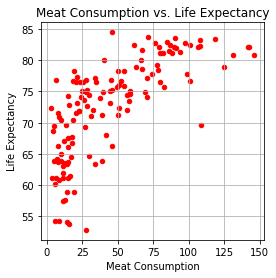

In [20]:
#1st relationship. Meat consumption vs Life Expectancy
lifeexpect_df = merged_df.loc[:, ["Country", "Life Expectancy", "Meat Consumption"]]
lifeexpect_df.head()

avg_lifex =  pd.DataFrame(lifeexpect_df.groupby(["Country", "Life Expectancy"])["Meat Consumption"].mean()).reset_index()



avg_lifex.plot(kind="scatter", x="Meat Consumption", y="Life Expectancy", grid=True, color='red', figsize=(4,4),
              title="Meat Consumption vs. Life Expectancy")
plt.show()

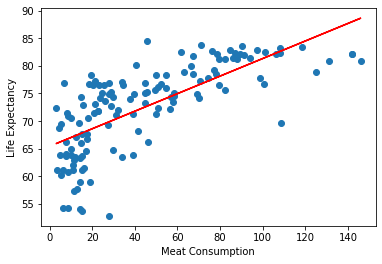

In [21]:
x_values = avg_lifex['Meat Consumption']
y_values = avg_lifex['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Meat Consumption')
plt.ylabel('Life Expectancy')
plt.show()

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lifex_data = merged_df["Life Expectancy"]
quartiles = lifex_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of life expectancy: {lower_quartile}")
print(f"The upper quartile of life expectancy: {upper_quartile}")
print(f"The interquartile range of life expectancy: {iqr}")
print(f"The median life expectancy is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = lifex_data.loc[(lifex_data < lower_bound) | (lifex_data > upper_bound)]

print(f"The potential outliers for Life Expectancy are below {lower_bound} and above {upper_bound} years of age.")

The lower quartile of life expectancy: 67.0
The upper quartile of life expectancy: 77.25
The interquartile range of life expectancy: 10.25
The median life expectancy is: 73.4
The potential outliers for Life Expectancy are below 51.625 and above 92.625.


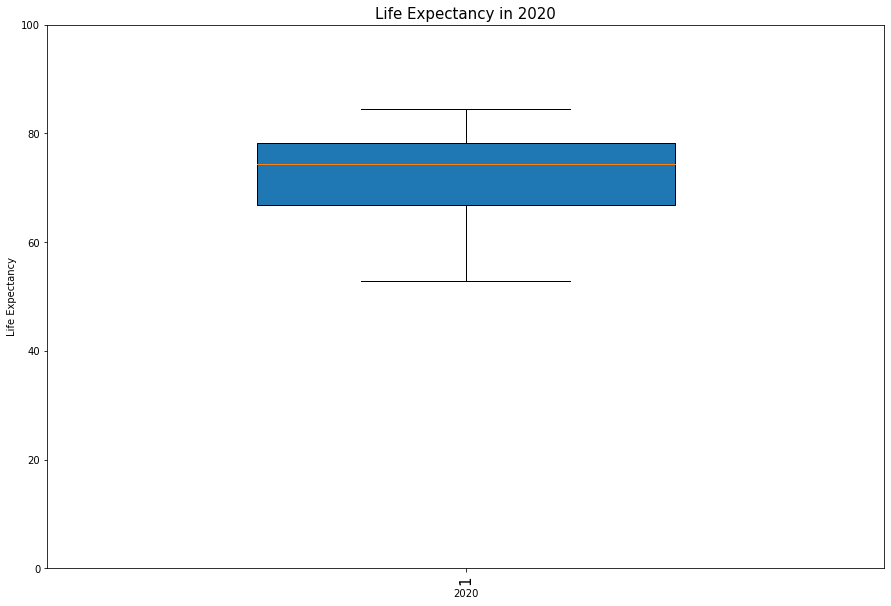

In [83]:
plt.subplots(figsize=(15, 10))
plt.title('Life Expectancy in 2020',fontsize =15)
plt.ylabel('Life Expectancy',fontsize = 10)
plt.xlabel('2020',fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 15)
plt.yticks(fontsize = 10)
plt.boxplot(lifex_data, widths = 0.5, patch_artist=True,vert=True)

plt.ylim(0, 100)

plt.show()

In [22]:
region_lifeexpect_df = merged_df.loc[:, ["Region", "Country", "Life Expectancy", "Meat Consumption"]]
region_lifeexpect_df.head()

,Region,Country,Life Expectancy,Meat Consumption
0,South Asia,Afghanistan,64.5,17.3
2,Middle East and North Africa,Algeria,76.7,18.3
8,Latin America and Caribbean,Argentina,76.5,79.7
9,Commonwealth of Independent States,Armenia,74.9,27.7
11,North America and ANZ,Australia,83.3,108.2


In [54]:
CEEuro_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Central and Eastern Europe",:]
Ind_States_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Commonwealth of Independent States",:]
EAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "East Asia",:]
LatA_C_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Latin America and Carribean",:]
MidE_NorA_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Middle East and North Africa",:]
NorAme_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "North America and ANZ",:]
SouthAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "South Asia",:]
SouthEastAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Southeast Asia",:]
SSAfrica_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Sub-Saharan Africa",:]
WEuro_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Western Europe",:]

CEEuro = CEEuro_df["Meat Consumption"]

Ind_States = Ind_States_df["Meat Consumption"]

EAsia = EAsia_df["Meat Consumption"]

LatA_C = LatA_C_df["Meat Consumption"]

MidE_NorA = MidE_NorA_df["Meat Consumption"]

NorAme = NorAme_df["Meat Consumption"]

SouthAsia = SouthAsia_df["Meat Consumption"]

SouthEastAsia = SouthEastAsia_df["Meat Consumption"]

SSAfrica = SSAfrica_df["Meat Consumption"]

WEuro = WEuro_df["Meat Consumption"]



Regions = ["Central and Eastern Europe","Commonwealth of Independent States","East Asia","Latin America and Carribean","Middle East and North Africa","North America and ANZ","South Asia","Southeast Asia","Sub-Saharan Africa","Western Europe"]


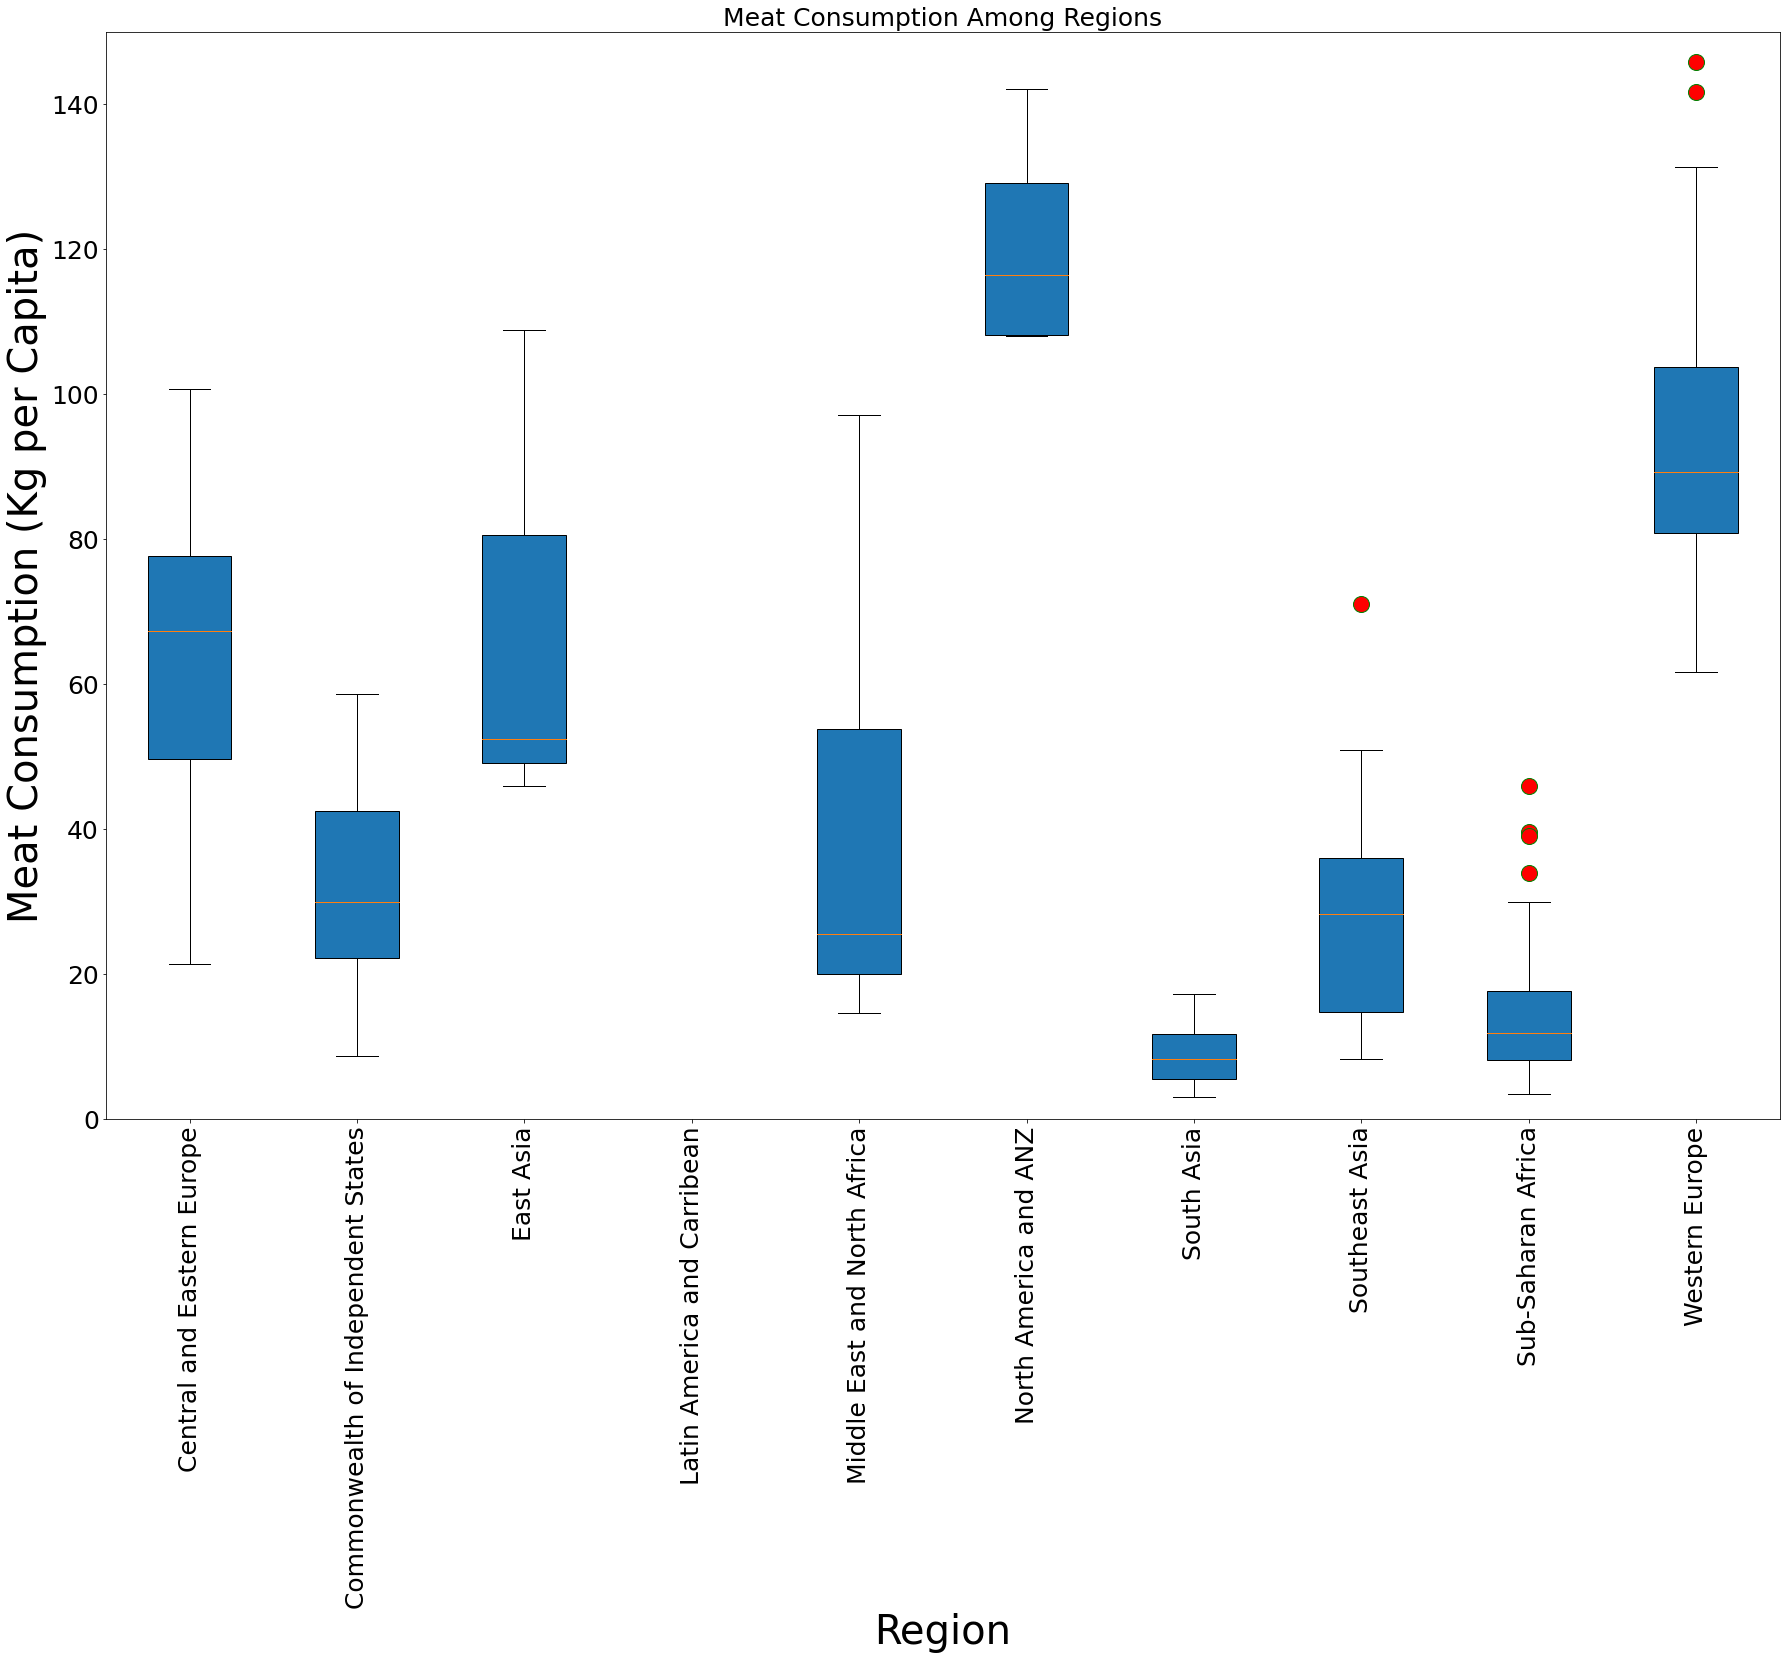

In [84]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=16,
                  linestyle='none', markeredgecolor='g')
data = [CEEuro,Ind_States,EAsia,LatA_C,MidE_NorA,NorAme,SouthAsia,SouthEastAsia,SSAfrica,WEuro]
plt.subplots(figsize=(30, 20))
plt.title('Meat Consumption Among Regions',fontsize =25)
plt.ylabel('Meat Consumption (Kg per Capita)',fontsize = 40)
plt.xlabel('Region',fontsize = 40)
plt.xticks(rotation='vertical',fontsize = 25)
plt.yticks(fontsize = 25)
plt.boxplot(data, labels=Regions, widths = 0.5, patch_artist=True,vert=True,flierprops=flierprops)

plt.ylim(0, 150)

plt.show()

In [23]:
reg_lifex_mean = region_lifeexpect_df.groupby('Region')['Life Expectancy'].mean()
reg_lifex_mean
reg_mc_mean = region_lifeexpect_df.groupby('Region')['Meat Consumption'].mean()
reg_mc_mean
lifex_mc_summary = pd.DataFrame({'Average Meat Consumption':reg_mc_mean,
                           'Average Life Expectancy':reg_lifex_mean})
lifex_mc_summary

,Average Meat Consumption,Average Life Expectancy
Region,,
Central and Eastern Europe,63.809091,77.409091
Commonwealth of Independent States,32.425000,72.266667
East Asia,69.033333,76.966667
Latin America and Caribbean,48.733333,74.914286
Middle East and North Africa,38.033333,75.446667
North America and ANZ,120.800000,81.650000
South Asia,9.083333,70.100000
Southeast Asia,30.850000,73.987500
Sub-Saharan Africa,15.711429,62.088571


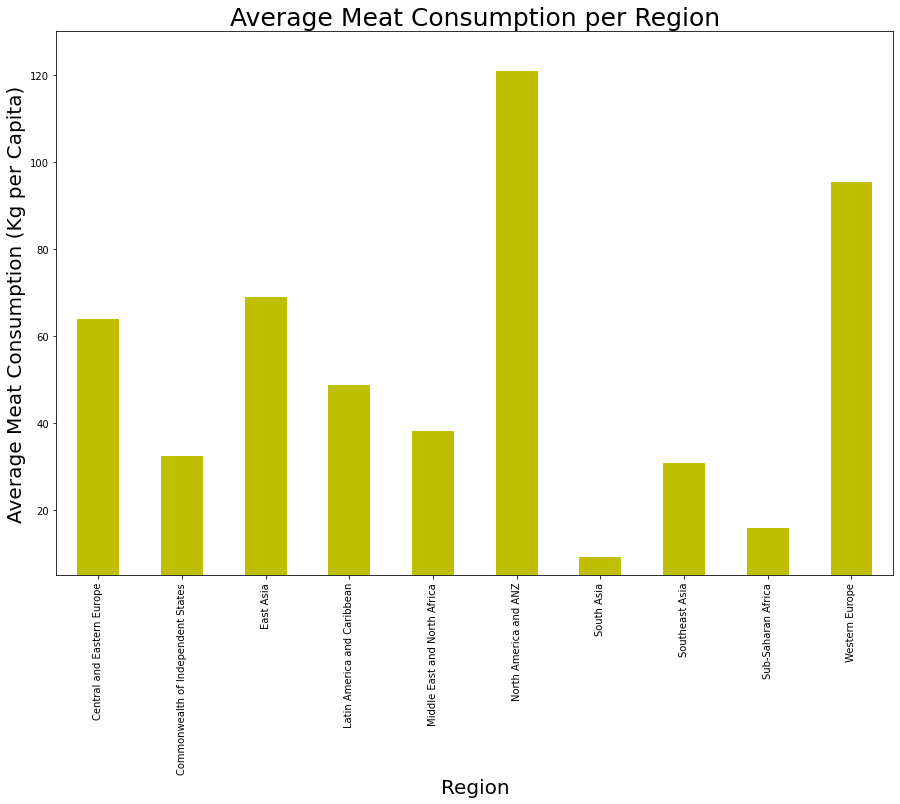

In [85]:
pd_plot = reg_mc_mean.plot.bar(figsize=(15,10),color = 'y')
plt.title("Average Meat Consumption per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Meat Consumption (Kg per Capita)",fontsize=20)
plt.ylim(5, 130)
plt.show()

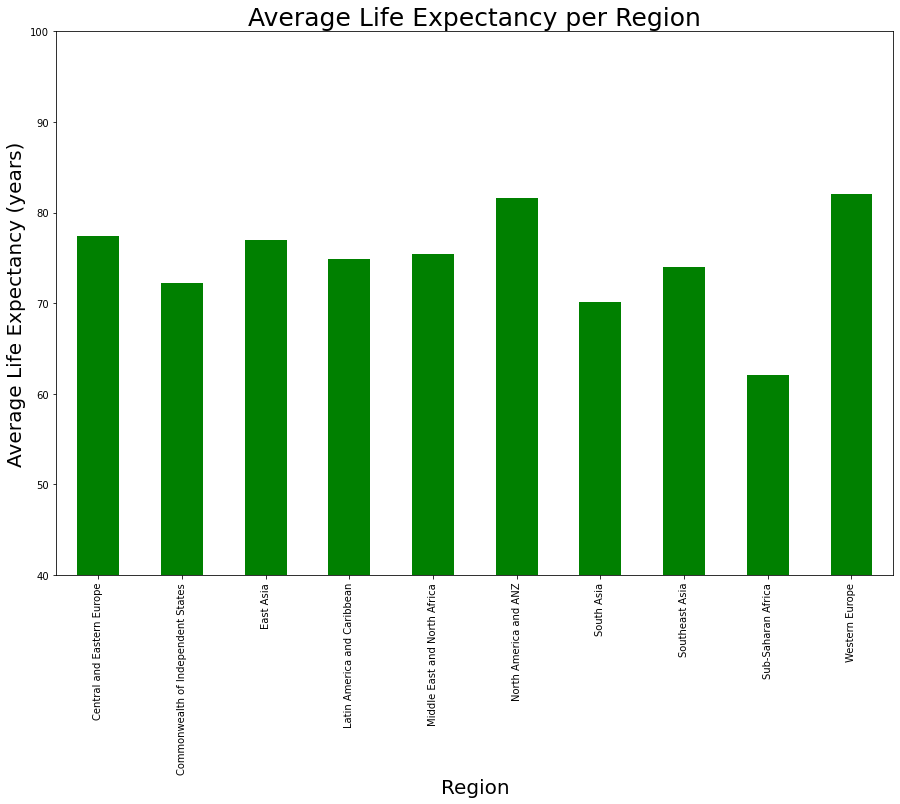

In [25]:
pd_plot = reg_lifex_mean.plot.bar(figsize=(15,10),color = 'g')
plt.title("Average Life Expectancy per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Life Expectancy (years)",fontsize=20)
plt.ylim(40, 100)
plt.show()